In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler


In [27]:
data = pd.read_csv('Covid-19_FR.csv', usecols=[1,5,6])
data['dateRep'] = pd.to_datetime(data['dateRep'])
data.head()

,dateRep,cases,totel
0,2019-12-31,0,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,0,0
4,2020-01-04,0,0


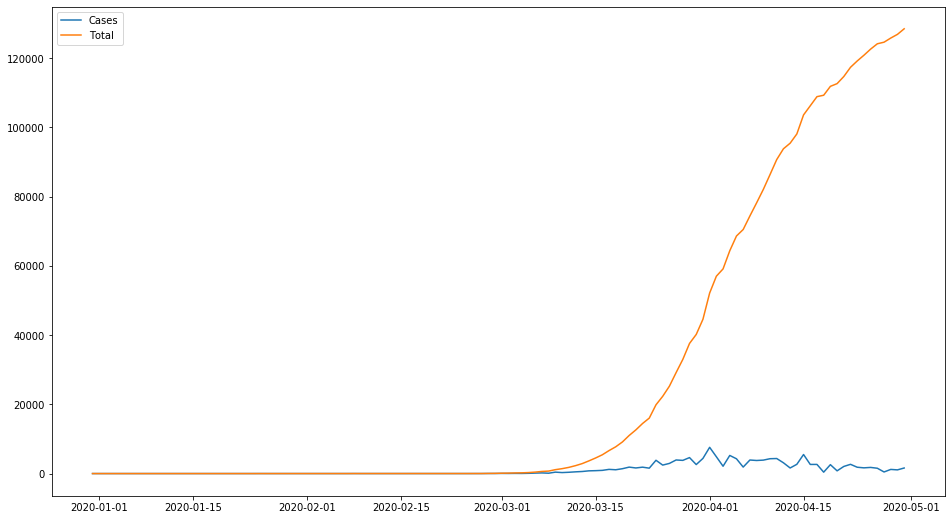

In [28]:
plt.figure(figsize=(16,9))
x = data['dateRep']
y = data['cases']
z = data['totel']
plt.plot(x,y)
plt.plot(x,z)
plt.legend(['Cases', 'Total'])
plt.show()

In [29]:
def create_dataset(dataset, look_back=9):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back),0]
		dataX.append(a)
		dataY.append(dataset[i + look_back,0])
	return np.array(dataX), np.array(dataY)


In [30]:
from sklearn.preprocessing import MinMaxScaler
dataset = data['totel'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(122, 1)

In [31]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [32]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [2.33568462e-05]
 [2.33568462e-05]
 [2.33568462e-05]
 [2.33568462e-05]
 [3.11424628e-05]
 [3.89280794e-05]
 [4.67136924e-05]
 [4.67136924e-05]
 [4.67136924e-05]
 [4.67136924e-05]
 [4.67136924e-05]
 [4.67136924e-05]
 [4.67136924e-05]
 [4.67136924e-05]
 [8.56417755e-05]
 [8.56417755e-05]
 [8.56417755e-05]
 [8.56417755e-05]
 [8.56417755e-05]
 [8.56417755e-05]
 [8.56417755e-05]
 [8.56417755e-05]
 [8.56417755e-05]
 [9.34273849e-05]
 [9.34273849e-05]
 [9.34273849e-05]
 [9.34273849e-05]
 [9.34273849e-05]
 [9.34273849e-05]
 [9.34273849e-05]
 [9.342738

In [33]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [34]:
model = Sequential()
model.add(LSTM(256, input_shape=(1, look_back), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=2, verbose=2)

Epoch 1/20
42/42 - 0s - loss: 5.9744e-04
Epoch 2/20
42/42 - 0s - loss: 5.5445e-04
Epoch 3/20
42/42 - 0s - loss: 5.4939e-04
Epoch 4/20
42/42 - 0s - loss: 4.7477e-04
Epoch 5/20
42/42 - 0s - loss: 4.4377e-04
Epoch 6/20
42/42 - 0s - loss: 4.0845e-04
Epoch 7/20
42/42 - 0s - loss: 3.2204e-04
Epoch 8/20
42/42 - 0s - loss: 2.5955e-04
Epoch 9/20
42/42 - 0s - loss: 1.9979e-04
Epoch 10/20
42/42 - 0s - loss: 1.2371e-04
Epoch 11/20
42/42 - 0s - loss: 8.8710e-05
Epoch 12/20
42/42 - 0s - loss: 6.5899e-05
Epoch 13/20
42/42 - 0s - loss: 2.5325e-05
Epoch 14/20
42/42 - 0s - loss: 1.4090e-05
Epoch 15/20
42/42 - 0s - loss: 6.5538e-06
Epoch 16/20
42/42 - 0s - loss: 3.7618e-06
Epoch 17/20
42/42 - 0s - loss: 1.6855e-06
Epoch 18/20
42/42 - 0s - loss: 1.6136e-06
Epoch 19/20
42/42 - 0s - loss: 1.6267e-06
Epoch 20/20
42/42 - 0s - loss: 1.4262e-06


In [35]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = trainPredict.reshape(-1,1)
testPredict = testPredict.reshape(-1,1)
#trainPredict = scaler.inverse_transform(trainPredict)
#testPredict = scaler.inverse_transform(testPredict)
#dataset = scaler.inverse_transform(dataset)

In [36]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
dataset = scaler.inverse_transform(dataset)

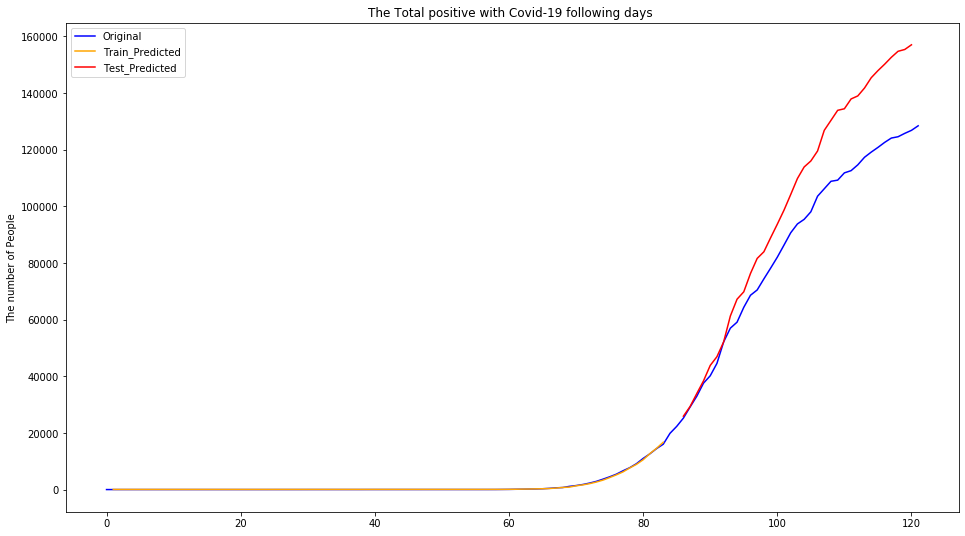

In [37]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,9))
plt.plot(dataset, color = 'blue')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'red')
plt.legend(['Original','Train_Predicted','Test_Predicted'])
plt.title('The Total positive with Covid-19 following days ')
plt.ylabel('The number of People')
plt.show()

In [38]:
testY =scaler.inverse_transform(testY.reshape(-1,1))

In [39]:
testY

array([[ 25233.],
       [ 29155.],
       [ 32964.],
       [ 37575.],
       [ 40174.],
       [ 44550.],
       [ 52128.],
       [ 56989.],
       [ 59105.],
       [ 64338.],
       [ 68605.],
       [ 70478.],
       [ 74390.],
       [ 78167.],
       [ 82048.],
       [ 86334.],
       [ 90676.],
       [ 93790.],
       [ 95403.],
       [ 98076.],
       [103573.],
       [106206.],
       [108847.],
       [109252.],
       [111821.],
       [112606.],
       [114657.],
       [117324.],
       [119151.],
       [120804.],
       [122577.],
       [124114.],
       [124575.],
       [125770.],
       [126835.]], dtype=float32)

In [40]:
testPredict

array([[ 25909.607],
       [ 29330.395],
       [ 33914.35 ],
       [ 38389.984],
       [ 43831.383],
       [ 46913.625],
       [ 52136.906],
       [ 61281.586],
       [ 67216.914],
       [ 69816.875],
       [ 76289.086],
       [ 81612.89 ],
       [ 83963.17 ],
       [ 88898.234],
       [ 93696.76 ],
       [ 98662.195],
       [104186.01 ],
       [109825.75 ],
       [113897.76 ],
       [116015.95 ],
       [119539.66 ],
       [126839.11 ],
       [130360.75 ],
       [133909.56 ],
       [134455.25 ],
       [137925.61 ],
       [138989.16 ],
       [141774.83 ],
       [145412.1  ],
       [147913.5  ],
       [150183.52 ],
       [152625.55 ],
       [154748.56 ],
       [155386.44 ],
       [157042.27 ]], dtype=float32)

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(testY, testPredict)
MSE = mean_squared_error(testY, testPredict)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

15274.436
334593820.0
18291.906


In [42]:
from sklearn.preprocessing import MinMaxScaler
dataset = data['totel'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(122, 1)

In [43]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [44]:
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [45]:
ANN_model = Sequential()
ANN_model.add(Dense(512, input_shape=(1, look_back), activation='relu'))
ANN_model.add(Dense(1))
ANN_model.compile(loss='mean_squared_error', optimizer='adam')
ANN_model.fit(trainX, trainY, epochs=20, batch_size=2, verbose=2)

Epoch 1/20
39/39 - 0s - loss: 2.4378e-04
Epoch 2/20
39/39 - 0s - loss: 9.4739e-06
Epoch 3/20
39/39 - 0s - loss: 4.3364e-06
Epoch 4/20
39/39 - 0s - loss: 6.1381e-06
Epoch 5/20
39/39 - 0s - loss: 5.6962e-06
Epoch 6/20
39/39 - 0s - loss: 6.3708e-06
Epoch 7/20
39/39 - 0s - loss: 4.2974e-06
Epoch 8/20
39/39 - 0s - loss: 3.4537e-06
Epoch 9/20
39/39 - 0s - loss: 2.3540e-06
Epoch 10/20
39/39 - 0s - loss: 1.3805e-06
Epoch 11/20
39/39 - 0s - loss: 2.0359e-06
Epoch 12/20
39/39 - 0s - loss: 2.4653e-06
Epoch 13/20
39/39 - 0s - loss: 1.6124e-06
Epoch 14/20
39/39 - 0s - loss: 1.1205e-06
Epoch 15/20
39/39 - 0s - loss: 9.6691e-07
Epoch 16/20
39/39 - 0s - loss: 9.9973e-07
Epoch 17/20
39/39 - 0s - loss: 2.2676e-06
Epoch 18/20
39/39 - 0s - loss: 1.1001e-05
Epoch 19/20
39/39 - 0s - loss: 3.0629e-06
Epoch 20/20
39/39 - 0s - loss: 1.1332e-06


In [46]:
trainPredict = ANN_model.predict(trainX)
testPredict = ANN_model.predict(testX)
trainPredict = trainPredict.reshape(-1,1)
testPredict = testPredict.reshape(-1,1)

In [47]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
dataset = scaler.inverse_transform(dataset)

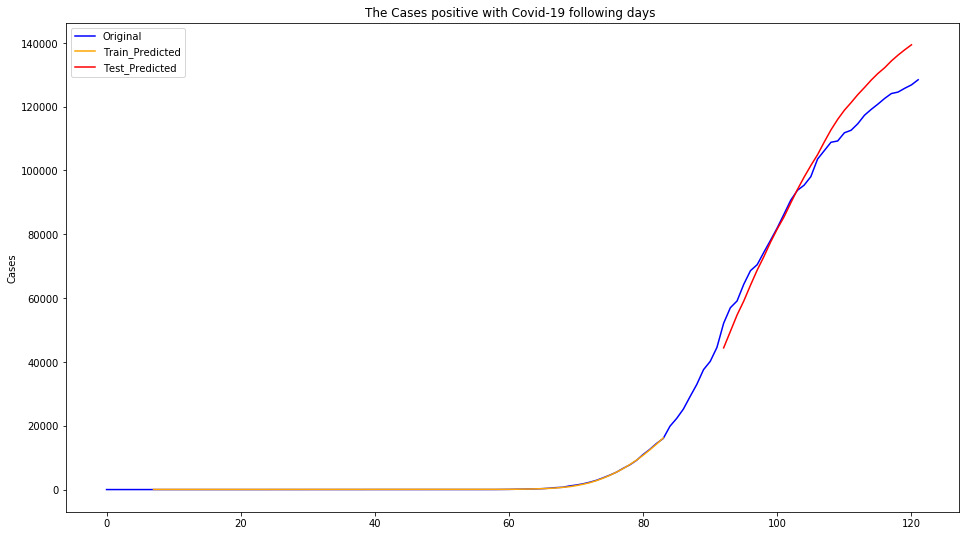

In [48]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,9))
plt.plot(dataset, color = 'blue')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'red')
plt.legend(['Original','Train_Predicted','Test_Predicted'])
plt.title('The Cases positive with Covid-19 following days ')
plt.ylabel('Cases')
plt.show()

In [49]:
testY =scaler.inverse_transform(testY.reshape(-1,1))

In [50]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(testY, testPredict)
MSE = mean_squared_error(testY, testPredict)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

5674.55
47352916.0
6881.3457
